<hr style="border-top: 3px solid black"></hr>
<center>
<h1><span style="color:black">Coding a Simplex Descent from Scratch</span></h1>
</center>
<hr style="border-top: 3px solid black"></hr>

**Activation function and its derivative:**

*Identity:* $ \text{I}(x) = \text{x} $


*Logistic:* $ S(x) = \frac{1}{1 + e^{-x}} $

**Error function:** 
*The Mean Squared Error*

$\text{MSE}(y_{\text{true}}, y_{\text{pred}}) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_{\text{true},i})^2$

**The simplex algorithm:**

First, you initialize some data points with vectors of two elements and their targets and define the wieght ranges that a simple heteroassociator would have to minimize its error using these weights.

Then, you define the activation functions and you compute the global error for each combination of the wieghts $ w_1 , w_2 $. 

One *simplex* epoch is as a move picking strategy that explore the error surface by randomly picking two new positions on the error surface and moves with the lower error.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp

In [2]:
# a) patterns
p1 = [0, 0]
p2 = [0, 1]
p3 = [1, 0]
p4 = [1, 1]
p_list = [p1, p2, p3, p4]

# b) targets
t1 = 0.3
t2 = 0.3
t3 = 0.1
t4 = 0.3
target_list = [t1, t2, t3, t4]

# the different weight possibilities
w1, w2 = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)

# defining activation functions
def identity(x):
    return x

def logistic(x):
    return 1 / (1 + exp(-x))

def output(activation_function, weighted_sum):
    return activation_function(weighted_sum)

In [3]:
def compute_network_mse(activation_function, w1, w2, p_list, target_list):
    mse_array = np.zeros((len(w1), len(w2)))
    num_patterns = len(p_list)
    for i, wi in enumerate(w1):
        for j, wj in enumerate(w2):
            total_squared_error = 0
            for p_idx, p in enumerate(p_list):
                weighted_sum = p[0] * wi + p[1] * wj
                output_t = output(activation_function, weighted_sum)
                error_t = output_t - target_list[p_idx]
                total_squared_error += error_t ** 2

            mse = total_squared_error / num_patterns
            mse_array[i, j] = mse
    return mse_array

errors_identity = compute_network_mse(identity, w1, w2, p_list, target_list)
errors_logistic = compute_network_mse(logistic, w1, w2, p_list, target_list)

In [4]:
def pick_a_move(global_error_array, current_x, current_y):
    moves = [-1, 0, 1]
    x_move = random.choice(moves)
    y_move = random.choice(moves)
    new_x = max(0, min(current_x + x_move, global_error_array.shape[0] - 1))
    new_y = max(0, min(current_y + y_move, global_error_array.shape[1] - 1))
    value = global_error_array[new_x][new_y]
    return value, new_x, new_y

def simplex_epoch(global_error_array, current_x, current_y):
    value1, x1, y1 = pick_a_move(global_error_array, current_x, current_y)
    value2, x2, y2 = pick_a_move(global_error_array, current_x, current_y)
    if value1 < value2:
        return x1, y1
    else:
        return x2, y2

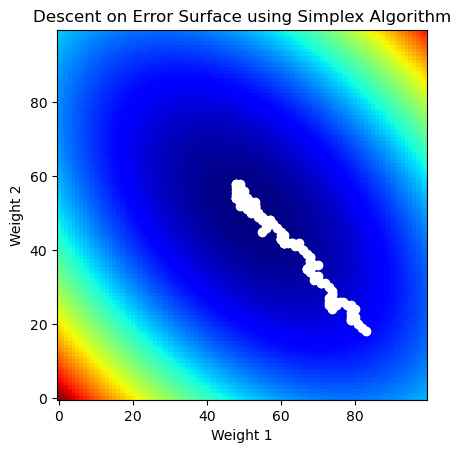

In [5]:
#initialization
initial_x, initial_y = np.random.randint(0, 100), np.random.randint(0, 100)
path = [(initial_x, initial_y)]
for _ in range(150):
    new_x, new_y = simplex_epoch(errors_identity, path[-1][0], path[-1][1])
    path.append((new_x, new_y))

x_coords, y_coords = zip(*path)
plt.imshow(errors_identity, cmap='jet', origin='lower')
plt.plot(x_coords, y_coords, 'w-o')
plt.title('Descent on Error Surface using Simplex Algorithm')
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.show()

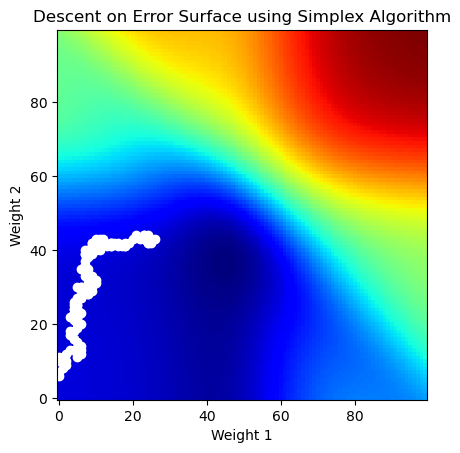

In [6]:
#Descentepour une fonction d'activation de type logistique
initial_x, initial_y = np.random.randint(0, 100), np.random.randint(0, 100)
path = [(initial_x, initial_y)]
for _ in range(150):
    new_x, new_y = simplex_epoch(errors_logistic, path[-1][0], path[-1][1])
    path.append((new_x, new_y))

x_coords, y_coords = zip(*path)
plt.imshow(errors_logistic, cmap='jet', origin='lower')
plt.plot(x_coords, y_coords, 'w-o')
plt.title('Descent on Error Surface using Simplex Algorithm')
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.show()

In [7]:
def plot_3d_descent(errors, path, w1, w2, title):
    w1_mesh, w2_mesh = np.meshgrid(w1, w2)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(w1_mesh, w2_mesh, errors.T, cmap='jet', alpha=0.8, edgecolor='none')
    x_coords = [w1[i] for i, _ in path]
    y_coords = [w2[j] for _, j in path]
    z_coords = [errors[i, j] for i, j in path]

    ax.plot(x_coords, y_coords, z_coords, 'k-x', markersize=2)
    ax.set_title(str('                    '+title+'                    '))
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Error')
    plt.show()

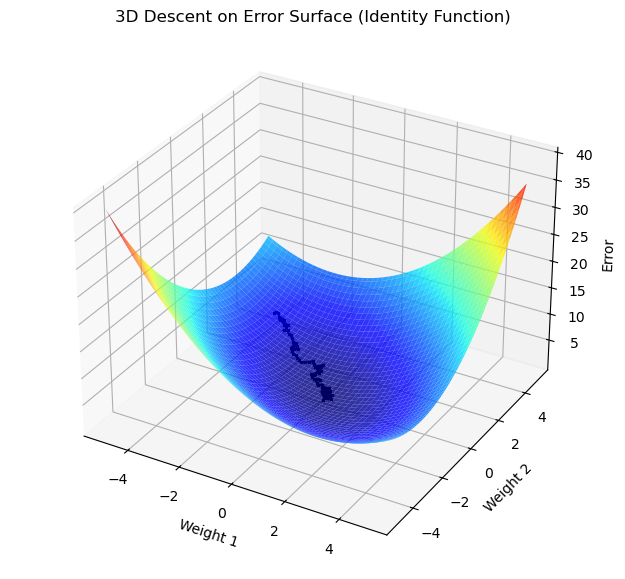

In [8]:
initial_x, initial_y = np.random.randint(0, 100), np.random.randint(0, 100)
path = [(initial_x, initial_y)]
for _ in range(150):
    new_x, new_y = simplex_epoch(errors_identity, path[-1][0], path[-1][1])
    path.append((new_x, new_y))
x_coords, y_coords = zip(*path)

plot_3d_descent(errors_identity, path, w1, w2, '3D Descent on Error Surface (Identity Function)')

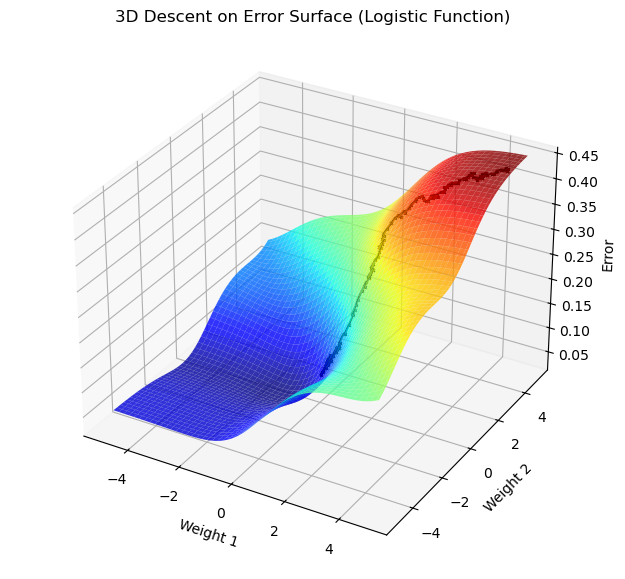

In [9]:
initial_x, initial_y = np.random.randint(0, 100), np.random.randint(0, 100)
path = [(initial_x, initial_y)]
for _ in range(150):
    new_x, new_y = simplex_epoch(errors_identity, path[-1][0], path[-1][1])
    path.append((new_x, new_y))
x_coords, y_coords = zip(*path)

plot_3d_descent(errors_logistic, path, w1, w2, '3D Descent on Error Surface (Logistic Function)')